# Partitioning Method
## KMeans
* Minimizing creteria : within-cluster-sum-of-squares.

  

* The centroids are chosen in such a way that it minimizes within cluster sum of squares.

* The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean  of the samples in the cluster. $\mu$

<img src="https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png" width="300px">

##### KMeans Algorithm
1. Initialize k centroids.
2. Select at random K points, the centroids(not necessary from the dataset)
3. Assign each data to the nearest centroid, this step will create clusters.
4. Compute and place the new centroid of each cluster.  
5. Reassign each data point to the new closest centroid. If any new reassignment, Repeat steps 4 otherwise go to Finish  

Animated Implementation of the Algorithm - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

### Random Initialization Trap
Depending on initialisation of Centroid we get different clusters for the same data  
Solution -> K-Means++

<img src="Image/kmeans1.png" width="300" />
<font size=1><center>Case 1</font>
    
<img src="Image/kmeans2.png" width="300" />
<font size=1><center>Case 2</font>


## Choosing the Right Number of Clusters
- WCSS -> Within Cluster Sum of Squares  
- Elbow Method to find the optimal number of clusters  
<img src="Image/elbow.jpg" width="300" />

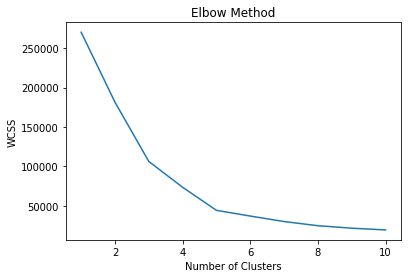

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Data/Unsupervised/Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

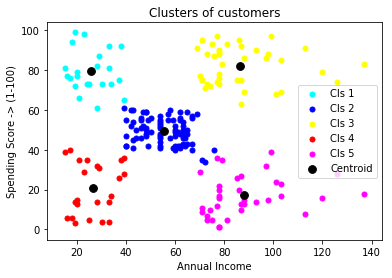

In [10]:
# Fitting K-Means to the dataset
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(X)

# Visualising the clusters
size = 25
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = size, c = 'cyan', label = 'Cls 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = size, c = 'blue', label = 'Cls 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = size, c = 'yellow', label = 'Cls 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = size, c = 'red', label = 'Cls 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = size, c = 'magenta', label = 'Cls 5')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score -> (1-100)')
plt.legend()
plt.show()

In [2]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(X)

In [3]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])